# (실습) 고전 컴퓨터 비전 - 심화 예제 실습



## 실습 개요
1) 실습 목적

이번 실습에서는 Contour Detection 즉, Contour를 검출하기 위한 과정을 실습해봅니다. 이를 위해 GitHub 저장소에서 이미지를 불러온 후, 먼저 이미지의 Edge를 검출해봅니다. OpenCV Library에서 Edge Detector의 대표적인 Canny Edge Detector를 이용하며, 어떤 출력값을 가지게 되는지를 직접 확인해보는 과정을 통해서 Edge Detector에 대한 이해를 높일 수 있습니다. 그 후, edge detector의 결과에 OpenCV Library를 이용해, Contour Detector 실습을 진행합니다. 추가로, Contour Detection을 세밀하게 검출하기 위해, Dilation 커널을 이용해보며, Dilation 커널의 적용 유무에 따른 Contour Detection 결과 차이를 확인해봅니다.

2) 수강 목표
- OpenCV Library를 활용하여, Edge detector를 구현할 수 있다.
- OpenCV Library를 활용하여, Contour detector를 구현할 수 있다.
- Dilation Kernel을 활용하여, Contour detection 성능 향상을 확인할 수 있다.

<img src='https://github.com/BupyeongHealer/sample-image/blob/02f2bc7f5d895c0a4c3e132a34418af6e2a6ab03/contour-detection.PNG?raw=true'>

### 실습 목차
* 1. GitHub 저장소를 이용해 이미지 Import 실습
  * 1-1. GitHub 저장소에서 이미지 불러오기

* 2. OpenCV Library를 이용한 Canny Edge Detection 실습
  * 2-1. OpenCV Library를 활용하여 Canny Edge Detector 구현 및 입출력 비교하기

* 3. OpenCV Library를 이용한 Contour Detection 실습
  * 3-1. OpenCV Library를 활용하여 Contour Detector 구현 및 입출력 비교하기
  * 3-2. Dilation Kernel을 활용하여 Contour Detector 성능 개선하기  

### 환경 설정

- 패키지 설치 및 임포트

In [ ]:
!pip3 install opencv-python==4.8.0.76  # 이미지 처리를 위한 라이브러리
!pip3 install numpy==1.23.5  # 다차원 배열 및 수치 계산을 위한 라이브러리
!pip3 install matplotlib==3.7.1 # 시각화를 위한 라이브러리

In [15]:
import cv2 # 이미지 처리를 위한 라이브러리
import numpy as np # 다차원 배열 형태의 데이터에 관한 라이브러리
import matplotlib.pyplot as plt # 이미지를 시각화하기위한 라이브러리

## 1. GitHub 저장소를 이용해 이미지 Import 실습

```
💡 목차 개요: GitHub 저장소에서 이미지를 Colab으로 불러오는 방법을 알아본다
```

- 1-1. GitHub 저장소에서 이미지 불러오기

### 1-1 GitHub 저장소에서 이미지 불러오기

> `GitHub` 저장소는 이미지 뿐만 아니라 코드 등을 함께 불러올 수 있습니다



#### 📝 설명: GitHub 저장소에서 이미지 불러오기
`!wget`커맨드를 사용하면 GitHub 저장소에서 원하는 image를 불러올 수 있습니다

- `!wget [원하는 주소]`
- `!wget https://raw.githubusercontent.com/BupyeongHealer/sample-image/fc0b8f8ccf7009d81e44c2fe794a17c9c6381348/logo-font.jpg`
- ..



📚 참고할만한 자료:
* [Github 공식 문서](https://docs.github.com/ko): 이미 완성된 코드 및 이미지 등을 불러올 수 있으며, 코드 버전 관리에 있어 유용하게 사용 가능합니다.

In [16]:
# GitHub 저장소에서 Colab으로 이미지를 불러옵니다
!wget https://raw.githubusercontent.com/BupyeongHealer/sample-image/7584aac88d1353fa35c3c9df67430056a804fce1/coin.jpg

--2024-01-29 11:08:28--  https://raw.githubusercontent.com/BupyeongHealer/sample-image/7584aac88d1353fa35c3c9df67430056a804fce1/coin.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62913 (61K) [image/jpeg]
Saving to: ‘coin.jpg.1’

coin.jpg.1          100%[===================>]  61.44K  --.-KB/s    in 0.004s  

2024-01-29 11:08:28 (15.7 MB/s) - ‘coin.jpg.1’ saved [62913/62913]



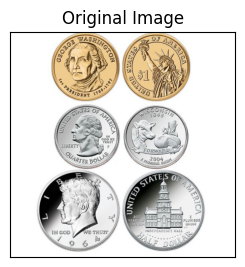

In [17]:
# 불러온 이미지를 입력값으로 가져옵니다
img = cv2.imread('coin.jpg')  # 'coin.jpg' 이미지를 불러옵니다.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 색상 공간 변환합니다.

# 원본 이미지를 시각화합니다
plt.subplot(121)
plt.imshow(img)  # 이미지를 표시합니다.
plt.title('Original Image')  # 제목을 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축 눈금을 표시하지 않습니다.
plt.show()  # 시각화를 표시합니다.

## 2. OpenCV Library를 이용한 Canny Edge Detection 실습
```
💡 목차 개요: Edge Detector의 대표적인 알고리즘인 Canny Edge Detector를 OpenCV Library에서 불러온 뒤 입력과 출력의 차이를 알아본다
```

- 2-1. OpenCV Library를 활용하여 Canny Edge Detector 구현 및 입출력 비교하기

### 2-1 OpenCV Library를 활용하여 Canny Edge Detector 구현 및 입출력 비교하기

> OpenCV Library를 활용해 Canny Edge Detector를 구현합니다. 입력이미지를 Edge Detector로 처리했을 때, 출력이미지가 어떻게 달라지는지 알아봅니다.

📚 참고할만한 자료:
* [Canny Edge Detector 문서](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html): Canny Edge Detector 알고리즘을 OpenCV Library에서 불러올 수 있으며, 입력 이미지를 손쉽게 처리하는데 유용하게 사용 가능합니다.

In [18]:
# Canny Edge Detector을 사용하여 Edge를 찾습니다
edges = cv2.Canny(img, 350, 500)  # Canny Edge Detection을 수행합니다 # 마지막 단계의 최소 최댓값 350,500

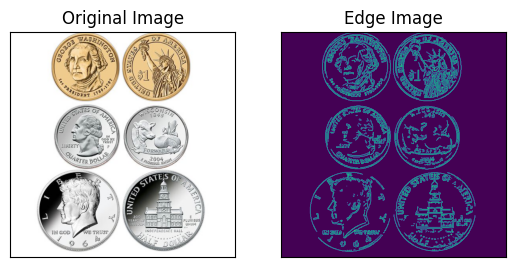

In [19]:
# 결과를 표시합니다.
plt.subplot(121), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()  # 시각화를 표시합니다

## 3. OpenCV Library를 이용한 Contour detection 및 dilation kernel 실습

```
💡 목차 개요: Contour Detector를 OpenCV Library에서 불러온 뒤 입력과 출력의 차이를 알아보며, Dilation Kernel을 이용하여 Contour Detection의 성능 변화를 확인할 수 있다
```

- 3-1. OpenCV Library를 활용하여 Contour Detector 구현 및 시각화하기
- 3-2. Dilation Kernel을 활용하여 Contour Detector 성능 개선하기  

### 3-1 OpenCV Library를 활용하여 Contour Detector 구현 및 시각화하기

> OpenCV Library를 활용해 Contour Detector를 구현합니다. 입력이미지를 Edge Detector와 Contour Detector로 처리했을 때, 출력이미지가 어떻게 달라지는지 알아봅니다.

📚 참고할만한 자료:
* [Contour Detector 문서](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html): Contour Detector 알고리즘을 OpenCV Library에서 불러올 수 있으며, 입력 이미지를 손쉽게 처리하는데 유용하게 사용 가능합니다.



In [20]:
# contours 변수에 경계선을 찾아 저장합니다. cv2.RETR_EXTERNAL로 외부 경계만 검출하며, cv2.CHAIN_APPROX_SIMPLE로 경계점을 간결하게 저장합니다.
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지의 복사본을 생성합니다.
image_copy = img.copy()

# 원본 이미지의 복사본에 경계선을 초록색으로 그립니다.
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

# 찾아진 경계선의 수를 출력합니다.
print(len(contours))

983


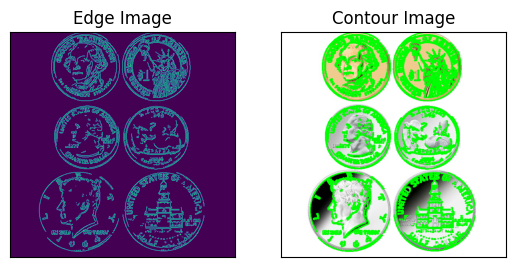

In [21]:
# 결과를 표시합니다.
plt.subplot(121), plt.imshow(edges)
plt.title('Edge Image')  # 그래프 제목을 'Edge Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.subplot(122), plt.imshow(image_copy)
plt.title('Contour Image')  # 그래프 제목을 'Contour Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.show()  # 시각화를 표시합니다.

### 3-2. Dilation Kernel을 활용하여 Contour Detector 성능 개선하기

> OpenCV Library를 활용해 Dilation 커널을 구현합니다. Dilation 커널을 적용한 후에 Contour Detector로 처리했을 때, 출력이미지가 어떻게 달라지는지 알아봅니다.




In [22]:
# Dilation 연산에 사용할 커널 정의
kernel = np.ones((3, 3), np.uint8)

# Dilation 연산 수행
dilate = cv2.dilate(edges, kernel, iterations=3)

In [23]:
# dilate 이미지에서 경계선을 찾아 contours 변수에 저장합니다. cv2.RETR_EXTERNAL로 외부 경계만 검출하며, cv2.CHAIN_APPROX_SIMPLE로 경계점을 간결하게 저장합니다.
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지의 복사본을 생성합니다.
image_copy = img.copy()

# 원본 이미지의 복사본에 경계선을 초록색으로 그립니다.
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

# 찾아진 경계선의 수를 출력합니다.
print(len(contours))

7


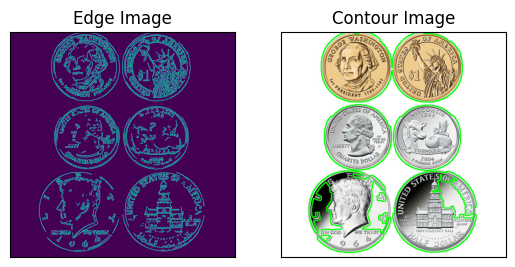

In [24]:
# 결과를 표시합니다.
plt.subplot(121), plt.imshow(edges)
plt.title('Edge Image')  # 그래프 제목을 'Edge Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.subplot(122), plt.imshow(image_copy)
plt.title('Contour Image')  # 그래프 제목을 'Contour Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.show()  # 그래프를 표시합니다.

## Reference
- <a href='https://docs.github.com/ko'>Github 공식 문서</a>
- <a href='https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html'>Canny Edge Detector 문서</a>
- <a href='https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html'>Contour Detector 문서</a>

credits:
- 이미지: <a href='https://www.pcscoins.com/dw/image/v2/BDZH_PRD/on/demandware.static/-/Sites-full-catalog/default/dwd96a8ff6/images/hi-res/rarely-seen-us-coins_RCM_a_Main.jpg?sw=575'>동전 이미지</a>


## Required Package

> opencv-python == 4.8.0.76

> numpy == 1.23.5

> matplotlib == 3.7.1